In [1]:
import os
import numpy as np
import pandas as pd
from random import randrange 
from PIL import Image
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
height = 224 # 224
width = 224 # 224
DEG_UNIT = 6

## Guage image

In [3]:
gauge_1 = "./gauge_img/gauge.png"

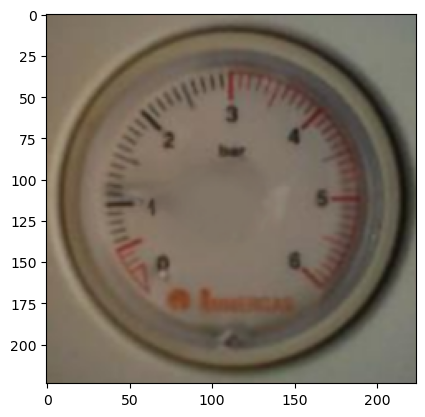

In [4]:
gauge_1_img = Image.open(gauge_1).convert('RGBA')
gauge_1_img = gauge_1_img.resize((height, width), Image.BILINEAR)
plt.imshow(gauge_1_img)

## Needle image

In [5]:
needle = "./gauge_img/needle.png"

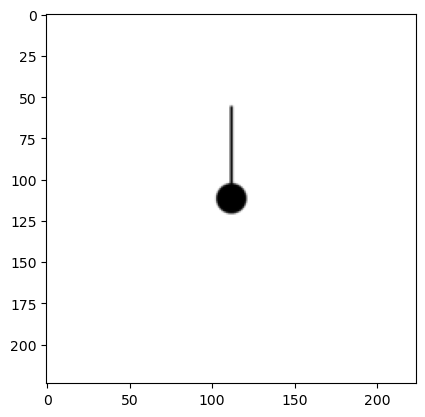

In [6]:
needle_img = Image.open(needle).convert('RGBA')
needle_img = needle_img.resize((height, width), Image.BILINEAR)
plt.imshow(needle_img)

## Generate Random Image

In [7]:
rotate_degree = randrange(0, 360) #-180,180

In [8]:
print("rotate degree: ", rotate_degree)

rotate degree:  158


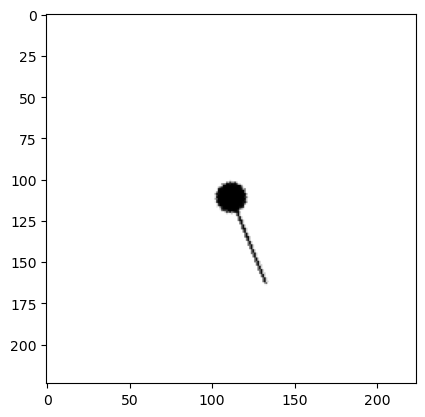

In [9]:
rotate_needle = needle_img.rotate(rotate_degree, expand=False)
rotate_needle = rotate_needle.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(rotate_needle)

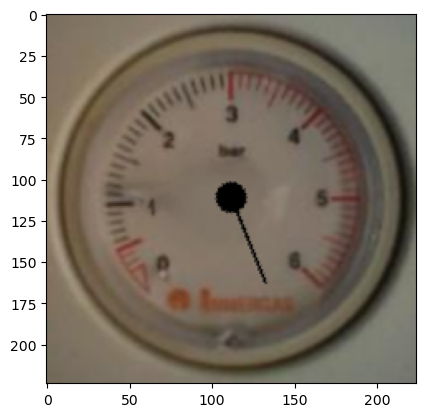

In [10]:
random_gauge = gauge_1_img.copy()
random_gauge.paste(rotate_needle.convert('L'), (0, 0), rotate_needle.convert('RGBA'))
plt.imshow(random_gauge)

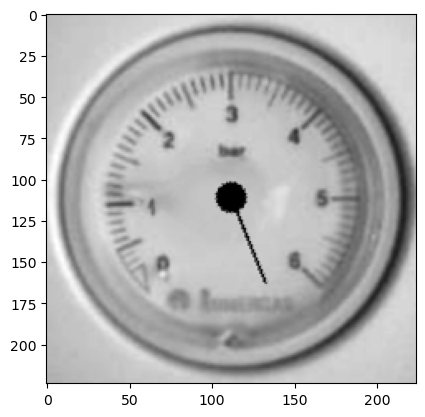

In [11]:
gray_random_gauge = random_gauge.convert('L')
plt.imshow(gray_random_gauge, cmap='gray')

In [12]:
# conda install openpyxl
def data_generator(num, imgDir_path, labDir_path):
    degree_list = []
    quan_degree_list = []
    for i in range(num):
        # Generate degree
        rotate_degree = randrange(0, 360) #-180,180 
        degree_list.append(rotate_degree)
        
        # Quantize degree
        quan_rotate_degree = int(rotate_degree/DEG_UNIT) # label scaling / DEG_UNIT
        quan_degree_list.append(quan_rotate_degree) 
        print("{}, rotate degree: {}, class: {}".format(i, rotate_degree, quan_rotate_degree))
        
        rotate_needle = needle_img.rotate(rotate_degree, expand=False)
        rotate_needle = rotate_needle.transpose(Image.FLIP_LEFT_RIGHT)
        
        random_gauge = gauge_1_img.copy()
        
        
        random_gauge.paste(rotate_needle.convert('L'), (0, 0), rotate_needle.convert('RGBA'))
        
        
        gray_random_gauge = random_gauge.convert('L') # to gray
        
        img_path = imgDir_path + '/' + str(i) + '.png'
        gray_random_gauge.save(img_path, "png")
     
    data = {"degree":degree_list,
            "class": quan_degree_list}
    df = pd.DataFrame(data)
#     df = pd.DataFrame(quan_degree_list, columns=['class'])
    df.index.name = None
    return df

In [13]:
imgDir_path = './train_img'
labDir_path = './train_label'

In [14]:
num = 5000

In [15]:
df = data_generator(num, imgDir_path, labDir_path)

0, rotate degree: 306, class: 51
1, rotate degree: 102, class: 17
2, rotate degree: 156, class: 26
3, rotate degree: 240, class: 40
4, rotate degree: 215, class: 35
5, rotate degree: 313, class: 52
6, rotate degree: 182, class: 30
7, rotate degree: 143, class: 23
8, rotate degree: 137, class: 22
9, rotate degree: 11, class: 1
10, rotate degree: 337, class: 56
11, rotate degree: 349, class: 58
12, rotate degree: 289, class: 48
13, rotate degree: 88, class: 14
14, rotate degree: 157, class: 26
15, rotate degree: 21, class: 3
16, rotate degree: 64, class: 10
17, rotate degree: 198, class: 33
18, rotate degree: 282, class: 47
19, rotate degree: 284, class: 47
20, rotate degree: 342, class: 57
21, rotate degree: 187, class: 31
22, rotate degree: 80, class: 13
23, rotate degree: 137, class: 22
24, rotate degree: 17, class: 2
25, rotate degree: 321, class: 53
26, rotate degree: 321, class: 53
27, rotate degree: 75, class: 12
28, rotate degree: 226, class: 37
29, rotate degree: 310, class: 51


247, rotate degree: 97, class: 16
248, rotate degree: 95, class: 15
249, rotate degree: 264, class: 44
250, rotate degree: 228, class: 38
251, rotate degree: 85, class: 14
252, rotate degree: 83, class: 13
253, rotate degree: 273, class: 45
254, rotate degree: 83, class: 13
255, rotate degree: 92, class: 15
256, rotate degree: 160, class: 26
257, rotate degree: 209, class: 34
258, rotate degree: 186, class: 31
259, rotate degree: 93, class: 15
260, rotate degree: 278, class: 46
261, rotate degree: 325, class: 54
262, rotate degree: 169, class: 28
263, rotate degree: 81, class: 13
264, rotate degree: 108, class: 18
265, rotate degree: 291, class: 48
266, rotate degree: 75, class: 12
267, rotate degree: 61, class: 10
268, rotate degree: 97, class: 16
269, rotate degree: 284, class: 47
270, rotate degree: 154, class: 25
271, rotate degree: 357, class: 59
272, rotate degree: 45, class: 7
273, rotate degree: 295, class: 49
274, rotate degree: 336, class: 56
275, rotate degree: 209, class: 3

In [16]:
df.head(5)

degree  class
0     306     51
1     102     17
2     156     26
3     240     40
4     215     35

In [17]:
df.to_csv(labDir_path + "/label.csv")

In [18]:
df

degree  class
0       306     51
1       102     17
2       156     26
3       240     40
4       215     35
..      ...    ...
495     345     57
496     237     39
497     105     17
498     195     32
499       5      0

[500 rows x 2 columns]

In [19]:
train_img_path = "./train_img/" 

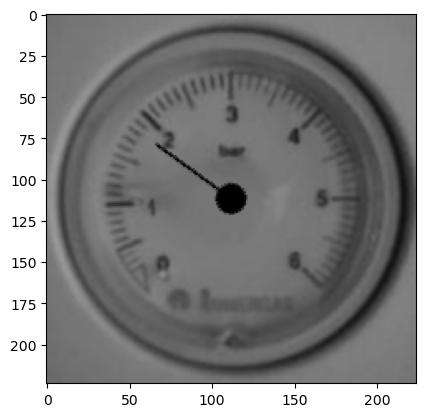

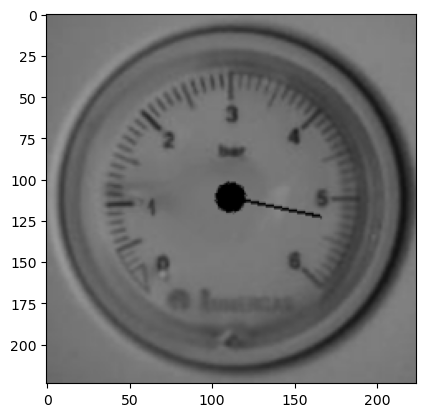

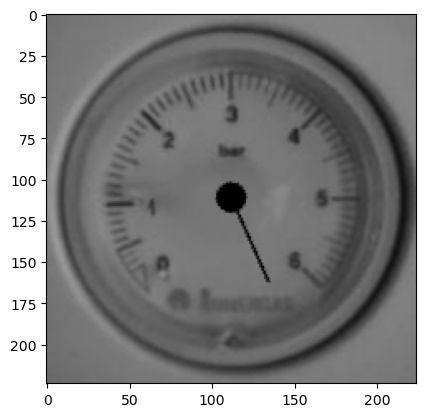

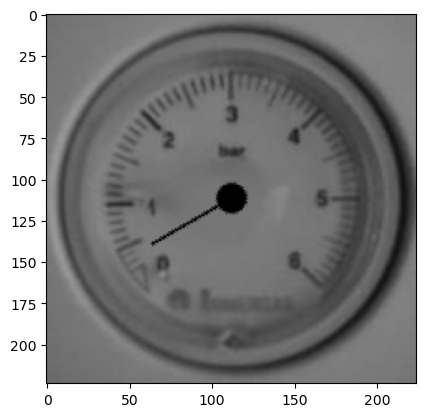

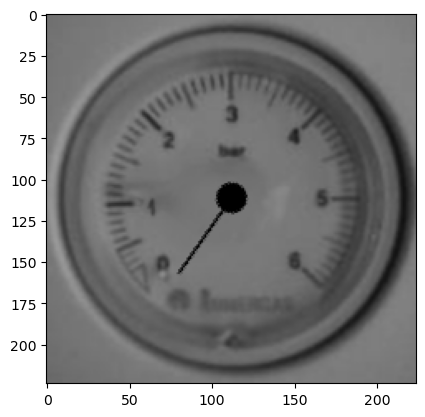

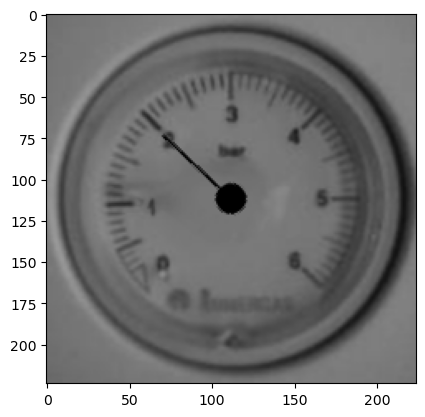

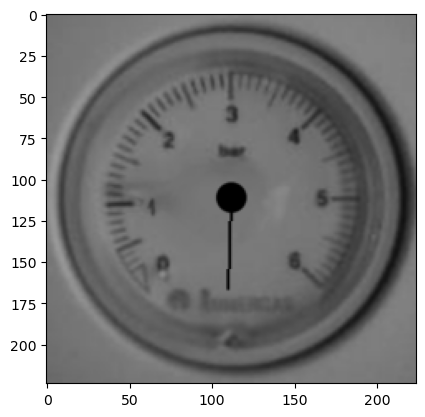

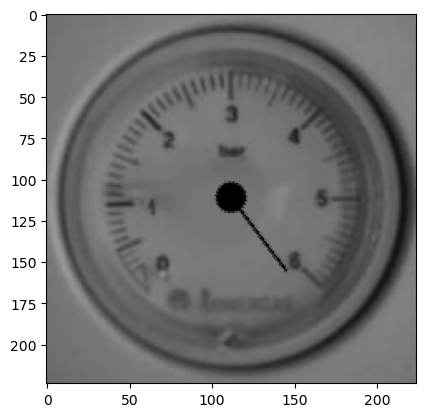

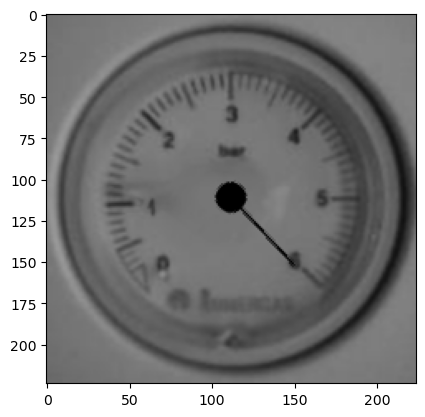

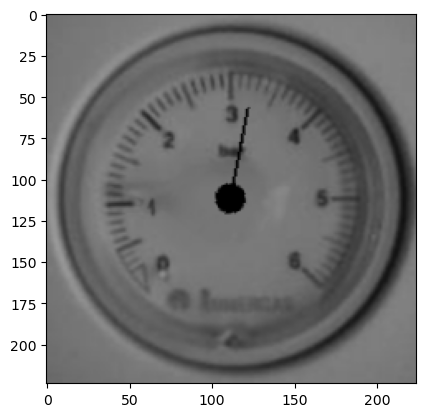

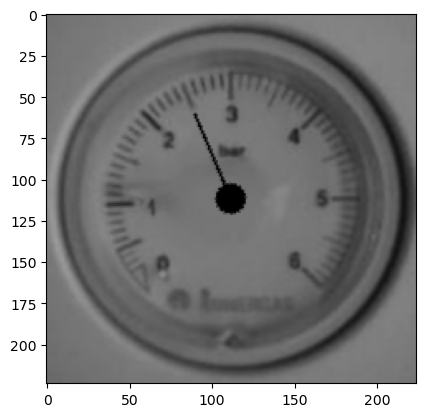

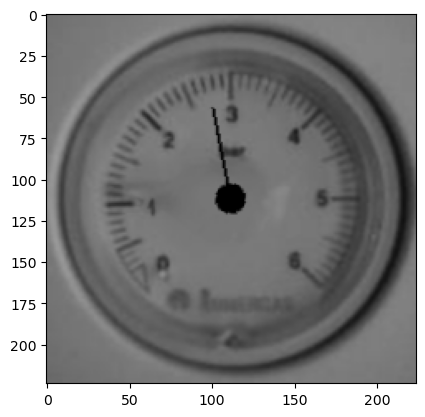

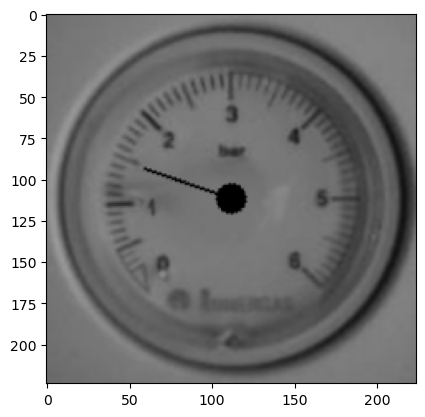

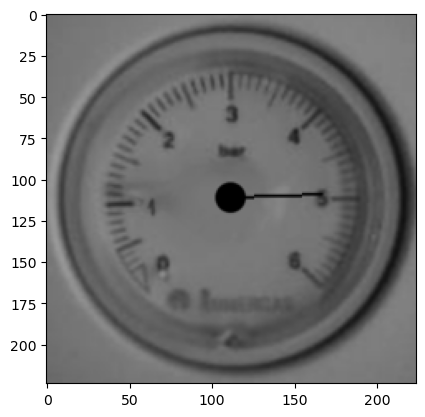

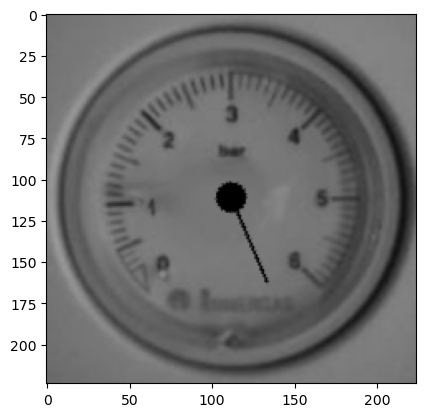

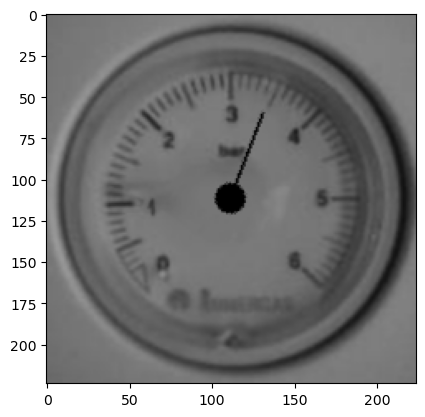

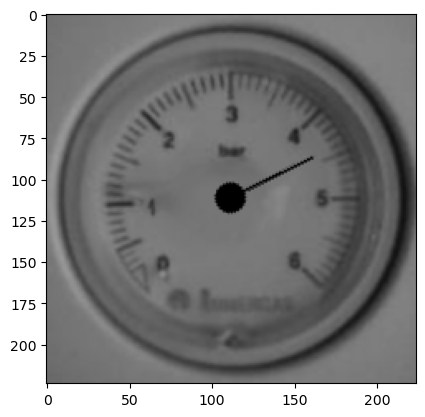

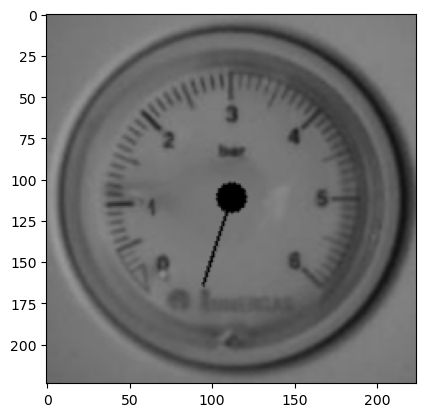

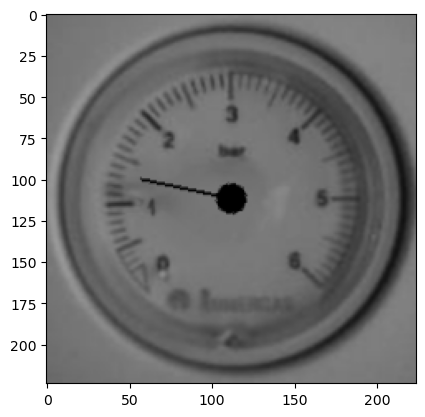

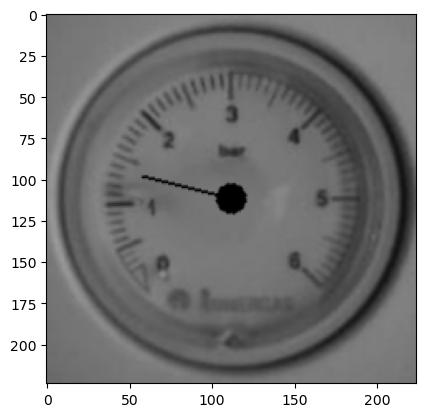

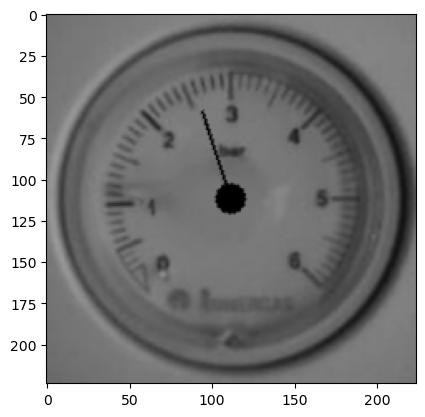

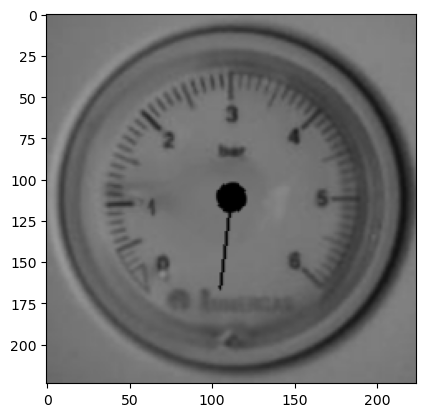

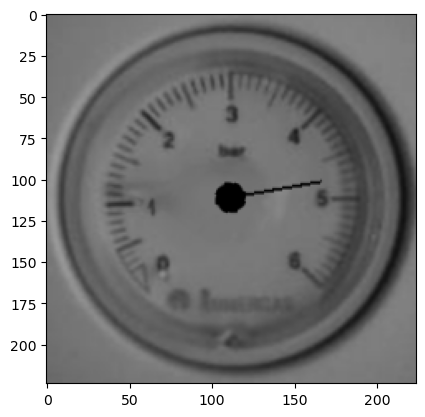

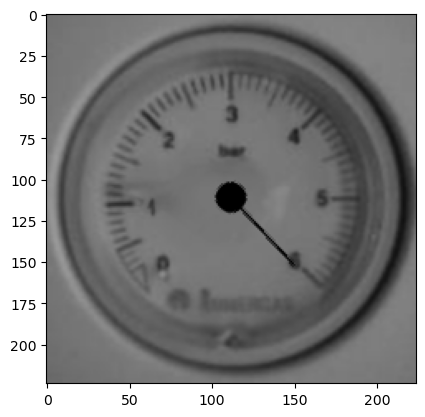

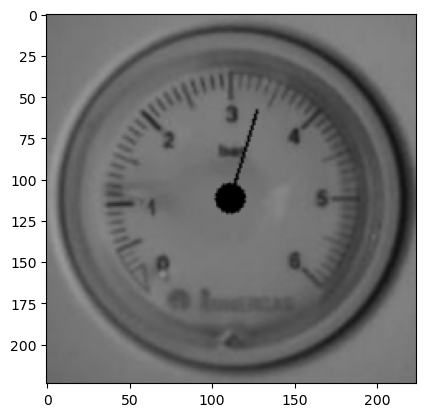

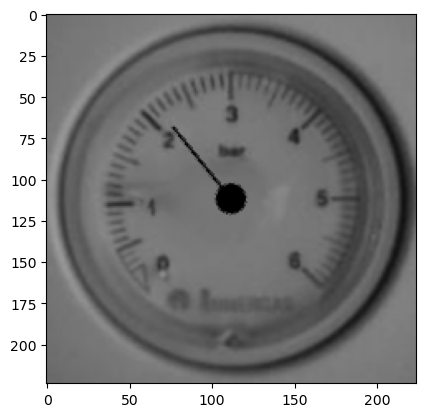

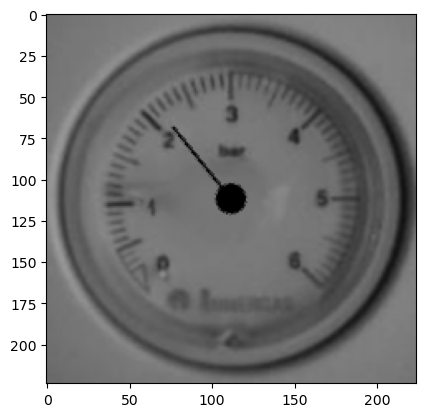

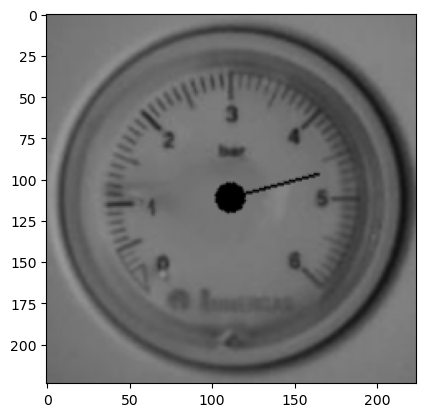

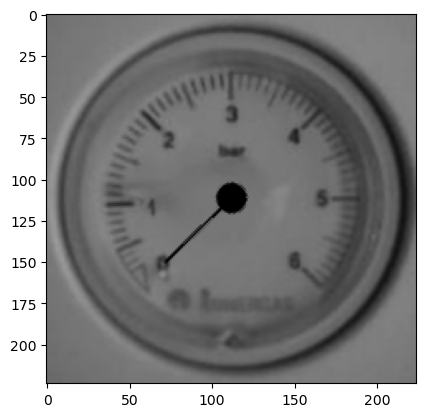

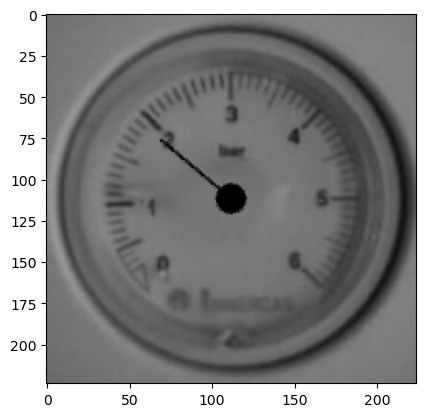

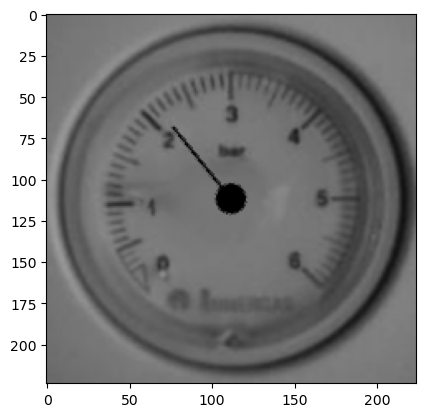

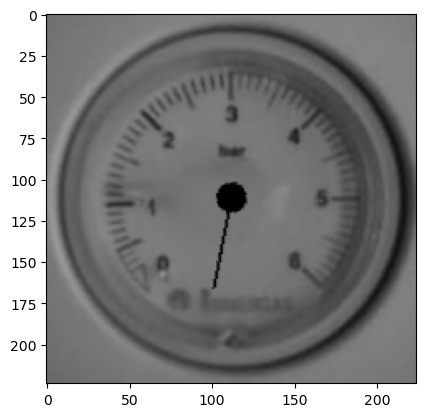

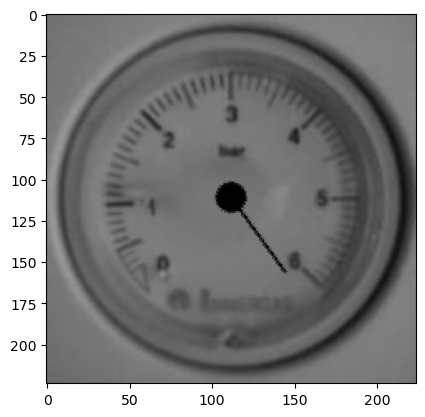

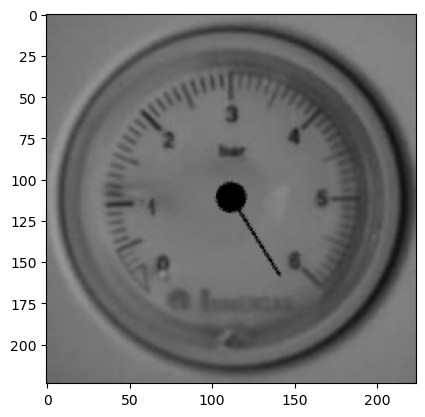

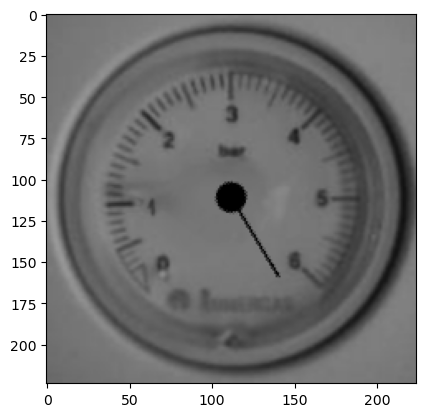

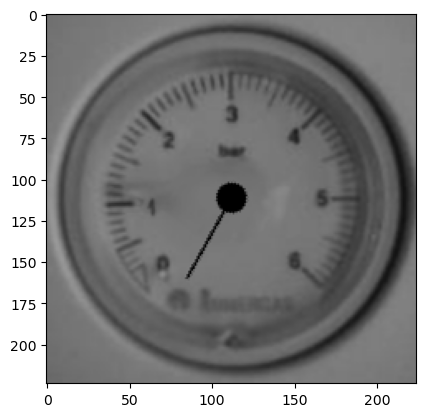

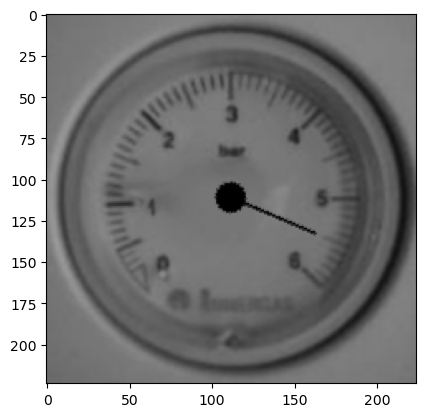

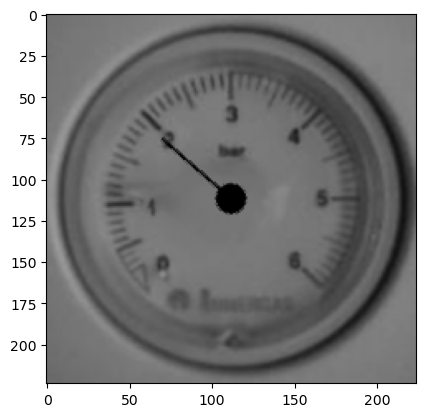

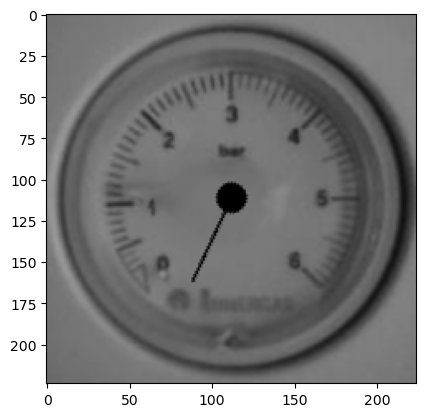

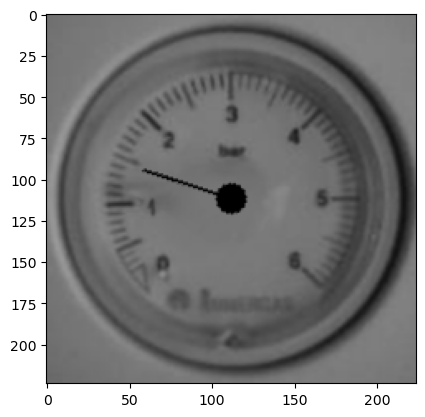

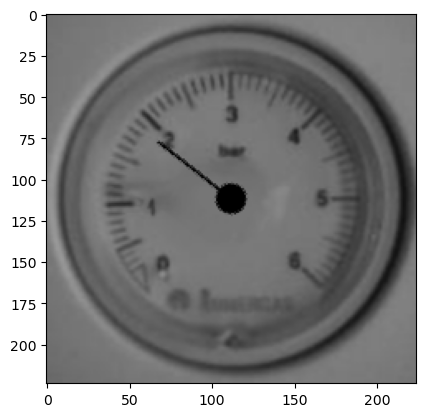

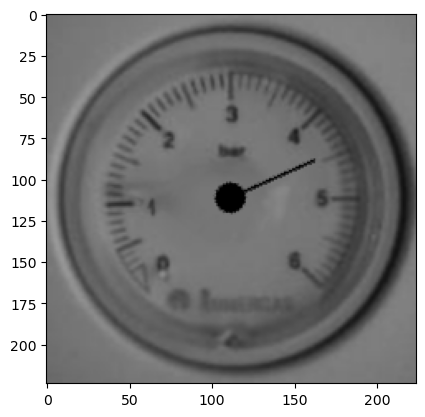

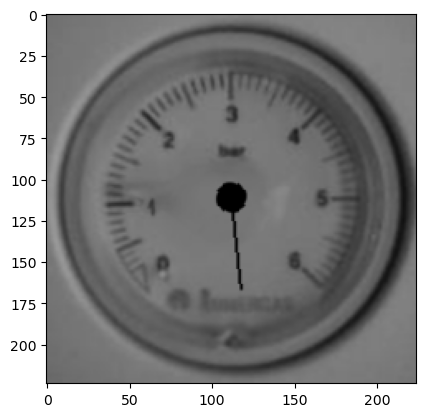

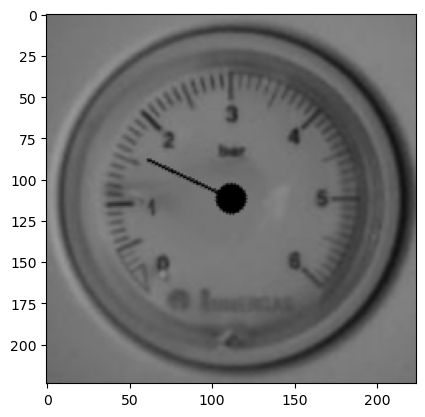

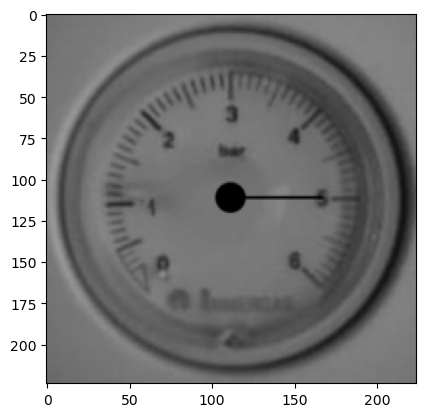

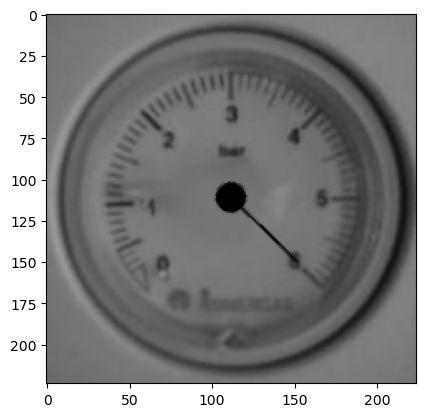

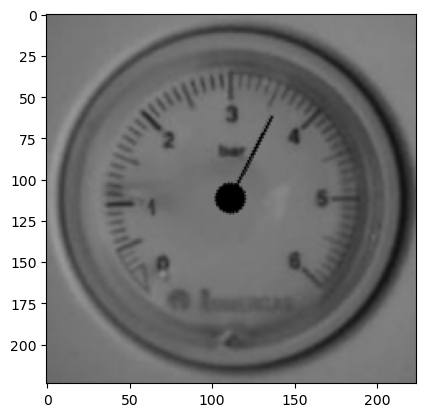

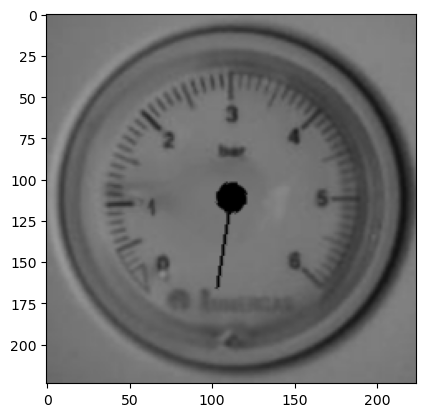

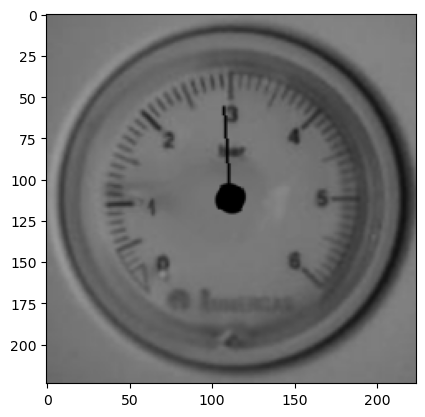

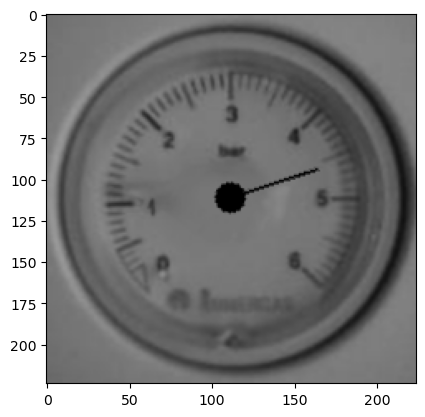

In [20]:
for i in range(50):
    show_img_path = train_img_path + str(i) + ".png"
    show_img = Image.open(show_img_path).convert('RGBA')
    plt.imshow(show_img, cmap='gray')
    plt.show()